In [4]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
class GridBoard:
    def __init__(self, cols, rows):
        self.rows = rows
        self.cols = cols
        self.rewards = pd.DataFrame(np.zeros((rows, cols)))
        self.walls = []
        for w in self.walls:
        # check here to see if walls within the dataframe boundaries
            if w[0] > -1 and w[0] < grid.cols:
                if w[1] > -1 and w[1] < grid.rows:
                    self.show_board[w[0]][w[1]] = "X"

        self.terminals = []  
        
        self.show_board = pd.DataFrame('.', index=range(self.rows), columns=range(self.cols))

        self.prevq = pd.DataFrame([[[0, 0, 0, 0] for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))

        # q_table of the ground truth when q-values converge
        self.qtruth = pd.DataFrame([[[0, 0, 0, 0] for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))

        # v table of where the ground truth of v values converage
        self.vtruth = pd.DataFrame(np.zeros((self.rows, self.cols)))
        self.prevv = pd.DataFrame(np.zeros((self.rows, self.cols)))

        self.key = []
        self.door = []



    
    def assignRewards(self, row, col, reward):
        self.rewards[row][col] = reward
    
    def assignTerminals(self, row, col):
        self.terminals.append([row, col])
    
    def reset_showboard(self):
        self.show_board = pd.DataFrame('.', index=range(self.rows), columns=range(self.cols))
        for w in self.walls:
            if w[0] > -1 and w[0] < grid.cols:
                if w[1] > -1 and w[1] < grid.rows:
                        self.show_board[w[0]][w[1]] = "X"
    
    def set_walls(self, walls):
        for w in walls:
            self.walls.append(w)
    
    def determineQtruth(self, iters, vBool, take1k):
        for i in range(0, len(iters)):
            print("qtableBeforeRun")
            print(player.qtable)
            #print("prevqBeforeRun")
            #print(self.prevq)

            run(False, iters[i], None, 1, True, 'ql') 

            print("qtableAfterRun")
            print(player.qtable)
            #print("prevqAfterRun")
            #print(self.prevq)
                
            if i > 0:        
                diffdf = pd.DataFrame([[[0, 0, 0, 0] for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))

                #print("qtable")
                #print(player.qtable)
                #print("prevq")
                #print(self.prevq)

                for c in range(0, len(player.qtable.columns)):
                    for r in range(0, len(player.qtable.index)):
                        for l in range(0, 4):   
                            diffdf[c][r][l] = round(player.qtable[c][r][l] - self.prevq[c][r][l],2)
                print("diffdf")
                print(diffdf)
                #print("qtruth")
                #print(self.qtruth)

                if self.qtruth.equals(diffdf):
                    print("CONVERGENCE!!!")              
                    self.qtruth = player.qtable[:]

                    if vBool == True:
                        print("in there")
                        for i in range(0, len(player.qtable.columns)):
                            for j in range(0, len(player.qtable.index)):                    
                                v = max(player.qtable[i][j])
                                self.vtruth[i][j] = v

                    return(iters)
                
                #done = False
                #for c in range(0, len(player.diffdf.columns)):
                #    for r in range(0, len(player.diffdf.index)):
                        
            if take1k == True:
                self.qtruth = player.qtable[:]
                return iters
            
            for c in range(0, len(player.qtable.columns)):
                    for r in range(0, len(player.qtable.index)):
                        for l in range(0, 4):   
                            self.prevq[c][r][l] = player.qtable[c][r][l]
            

            #self.prevq = player.qtable.copy()
            #print('Prevq')
            #print(self.prevq)





In [6]:
class Player:
    def __init__(self, grid, start):
        self.start = start
        self.curr_state = self.start[:]
        grid.show_board[self.curr_state[0]][self.curr_state[1]] = "*"
        self.policy = pd.DataFrame(0, index=range(0,grid.rows), columns=range(0,grid.cols))
        self.v = pd.DataFrame(np.zeros((grid.rows, grid.cols)))
        self.vtable = pd.DataFrame(np.zeros((grid.rows, grid.cols)))

        # q_tables are a list within a dataframe cell with the directions [North, East, South, West], always start at 0
        self.qtable = pd.DataFrame([[[0, 0, 0, 0] for j in range(grid.cols)] for i in range(grid.rows)], index=range(grid.rows), columns=range(grid.cols))

        self.gotkey = False


    
    def move(self, direct):
        # determine if a move can occur
        # possible values for act: N, S, E, W
        # need next_state to find walls

        if direct == 'N':
            next_state = [self.curr_state[0], self.curr_state[1]-1]
            if self.curr_state[1] != 0 and next_state not in grid.walls: self.curr_state[1] -= 1 

        elif direct == 'E':
            next_state = [self.curr_state[0]+1, self.curr_state[1]]
            if next_state[0] < grid.cols and next_state not in grid.walls: self.curr_state[0] += 1 

        elif direct == 'S':
            next_state = [self.curr_state[0], self.curr_state[1]+1]
            if next_state[1] < grid.rows and next_state not in grid.walls: self.curr_state[1] += 1 

        elif direct == 'W':
            next_state = [self.curr_state[0]-1, self.curr_state[1]]
            if self.curr_state[0] != 0 and next_state not in grid.walls: self.curr_state[0] -= 1 

        else:
            print("Invalid option")

        grid.reset_showboard()
        grid.show_board[self.curr_state[0]][self.curr_state[1]] = '*'
    
    def detNextState(self, curr_state, direct):

        if direct == 'N': next_state = [self.curr_state[0], self.curr_state[1]-1]
        elif direct == 'E': next_state = [self.curr_state[0]+1, self.curr_state[1]]
        elif direct == 'S': next_state = [self.curr_state[0], self.curr_state[1]+1]
        elif direct == 'W': next_state = [self.curr_state[0]-1, self.curr_state[1]]
        else: print("Invalid option")
        
        return next_state    
    
    def findRandDirection(self):
        d = random.randint(1,4)
        if d == 1: return 'N'
        elif d == 2: return 'E'
        elif d == 3: return 'S'
        elif d == 4: return 'W'
        else:
            print("out of bounds")
        
    def detPolicyV(self):
        # determine policy & V table
        for i in range(0, len(player.policy.columns)):
            for j in range(0, len(player.policy.index)):
                dir = player.qtable[i][j].index(max(player.qtable[i][j]))         
                dirv = getDirChar(dir)
                player.policy[i][j] = dirv
                
                v = max(player.qtable[i][j])
                player.v[i][j] = v
            


In [7]:
class QLearn:
    def __init__(self, gamma, lr, deterministic):
        self.gamma = gamma
        self.deterministic = deterministic
        if not deterministic:
            self.lr = lr
        else:
            self.lr = 1
    
    def findQhat(self, rewards, qtable, cs, ns, d):
        qhat = 0
        if self.deterministic == True:
            if ns not in grid.walls:
                qhat = rewards[ns[0]][ns[1]] + self.gamma * max(qtable[ns[0]][ns[1]][0], qtable[ns[0]][ns[1]][1], qtable[ns[0]][ns[1]][2], qtable[ns[0]][ns[1]][3])
        else:
            if ns not in grid.walls:
                qhat = (1-self.lr) * qtable[cs[0]][cs[1]][d] + \
                    self.lr * (rewards[ns[0]][ns[1]] + self.gamma * \
                    max(qtable[ns[0]][ns[1]][0], qtable[ns[0]][ns[1]][1], qtable[ns[0]][ns[1]][2], qtable[ns[0]][ns[1]][3]))

        return qhat
    
    def findSarsa(self, rewards, qtable, cs, ns, d):
        # difference with Sarsa is it follows a policy premade
        qhat = 0
        if ns not in grid.walls:
            nextDir = getDirInt(player.policy[ns[0]][ns[1]])
            qhat = (1-self.lr) * qtable[cs[0]][cs[1]][d] + self.lr * (rewards[ns[0]][ns[1]] + self.gamma * qtable[ns[0]][ns[1]][nextDir])
            
        return qhat

    def findV(self, rewards, qtable, cs, ns, d):
        # used for TD
        v = 0
        if ns not in grid.walls:
            nextDir = getDirInt(player.policy[ns[0]][ns[1]])
            v = player.vtable[cs[0]][cs[1]] + self.lr * (rewards[ns[0]][ns[1]] + self.gamma * (player.vtable[ns[0]][ns[1]] - player.vtable[cs[0]][cs[1]]))
            
        return v

In [8]:
class Charts():
    def __init__(self, episodes):
        self.stepsGoal = pd.DataFrame(0, columns=['Steps'], index=range(1, episodes+1))
        self.stepsGoal.index.name = 'Episodes'
        self.sse = pd.DataFrame(0, columns=['SSE'], index=range(1, episodes+1))

    
    def determineSSE(self, type):
        if type == 'q':
            truth = grid.qtruth
            pred = player.qtable
        else:
            truth = grid.vtruth
            pred = player.vtable

        truthList = []
        currentPred = []
        sseVal = 0

        #print("inside vtruth")
        #print(grid.vtruth)
        #print("inside vtable")
        #print(player.vtable)

        # convert the DF of lists into a big list per DF
        for c in range(0, len(truth.columns)):
            for r in range(0, len(truth.index)):
                truthList.append(truth[c][r])

        for c in range(0, len(pred.columns)):
            for r in range(0, len(pred.index)):
                currentPred.append(pred[c][r])
            
        #print("truthList")
        #print(truthList)
        #print("currentPred")
        #print(currentPred)

        if type == 'q':
            truthList = [j for i in truthList for j in i]
            currentPred = [j for i in currentPred for j in i]

        #print("truthList")
        #print(truthList)
        #print("currentPred")
        #print(currentPred)

        for t in range(0, len(truthList)):
            sseVal += (truthList[t] - currentPred[t])**2
        
        #print("sse")
        #print(sseVal)

        return sseVal

In [9]:
# function to create gridboard, set up walls & boundaries and assign rewards
# recieves: columns, rows, arewards array for rewards
def setupGrid(columns, rows, arewards, aterminals, key, door):
    grid = GridBoard(columns, rows)
    grid.key = key
    grid.door = door
    
    # create walls and boundaries, treat out of bounds as walls
    for c in range(0, grid.cols):
        grid.walls.append([c, -1])
        grid.walls.append([c, grid.rows])
    for r in range(0, grid.rows):
        grid.walls.append([-1, r])
        grid.walls.append([grid.cols, r])

    #print(grid.walls)

    for reward in arewards:
        grid.assignRewards(reward[0], reward[1], reward[2])
    
    for terminal in aterminals:
        grid.assignTerminals(terminal[0], terminal[1])
    
    #print(grid.terminals)

    return grid

In [10]:
def getDirInt(direct):
    d = 0
    if direct == 'N': d = 0
    elif direct == 'E': d = 1
    elif direct == 'S': d = 2
    elif direct == 'W': d = 3
    return d

def getDirChar(direct):
    d = ''
    if direct == 0: d = 'N'
    elif direct == 1: d = 'E'
    elif direct == 2: d = 'S'
    elif direct == 3: d = 'W'
    return d

In [38]:
# receives: pdef (if predefined path or not), iterations, path (none if not predefined)
def run(pdef, iters, path, eps, getQtruth, alg):
   
    if pdef == False:
        for i in range(0, iters):
            stepCount = 0
            while player.curr_state not in grid.terminals:
                x = player.curr_state[0]
                y = player.curr_state[1]

                p = np.random.random()
                if p < (1-eps):
                    if player.policy[x][y] != 0:
                        direct = player.policy[x][y]
                    else: 
                        direct = player.findRandDirection()
                else: # random
                    direct = player.findRandDirection()

                next_state = player.detNextState(player.curr_state, direct)

                d = getDirInt(direct)



                if alg == 'ql':
                    qhat = qlearn.findQhat(grid.rewards, player.qtable, player.curr_state, next_state, d)
                    qhat = round(qhat, 2)
                    player.qtable[x][y][d] = qhat
                elif alg == 'sarsa':
                    qhat = qlearn.findSarsa(grid.rewards, player.qtable, player.curr_state, next_state, d)
                    qhat = round(qhat, 2)
                    player.qtable[x][y][d] = qhat
                elif alg == 'td':
                    vhat = qlearn.findV(grid.rewards, player.qtable, player.curr_state, next_state, d)
                    vhat = round(vhat, 2)
                    player.vtable[x][y] = vhat                 

                player.move(direct)
                stepCount += 1   
                #if getQtruth == False: 
                #    print(stepCount)           

                #print(player.curr_state)
                
                #print(grid.walls)     

                if grid.door is not None:
                    #if player.curr_state == grid.door:
                        #print("In the door")
                        #print(direct)
                        #print(grid.show_board)     

                    
                    if player.curr_state == grid.key:
                        player.gotkey = True
                        #print("Got the key")
                        #print(grid.show_board)     

                        #print(grid.door)
                        #print(grid.walls)
                        if grid.door in grid.walls:
                            grid.walls.remove(grid.door)
                        #print(grid.walls)     

            if getQtruth == False:
                # determine the new policy and V table
                if alg == 'ql':
                    player.detPolicyV()

                # update the steps goal df
                charts.stepsGoal['Steps'][i+1] = stepCount

                # get SSE
                #print(i)
                #print(charts.sse)
                if alg == 'td':
                    charts.sse['SSE'][i+1] = charts.determineSSE('v')
                else:
                    charts.sse['SSE'][i+1] = charts.determineSSE('q')


                

            # move player back to start position
            player.curr_state = player.start[:]
            # reset door
            if grid.door is not None:
                grid.walls.append(grid.door)
                player.gotkey = False
            print(i)
            #print(i)
            #print("after in Run: prevq")
            #print(grid.prevq)
            #print("after in Run: qtable")
            #print(player.qtable)   
        player.qtable = player.qtable.round(2)
        player.vtable = player.vtable.round(2)
        #print("each iteration vtable")
        #print(player.vtable)
        #print("each iteration qtable")
        #print(player.qtable)

    
    else:   
        for t in path:            
            for direct in t:
                x = player.curr_state[0]
                y = player.curr_state[1]

                next_state = player.detNextState(player.curr_state, direct)

                d = getDirInt(direct)

                qhat = qlearn.findQhat(grid.rewards, player.qtable, player.curr_state, next_state, d)

                qhat = round(qhat, 2)

                player.qtable[x][y][d] = qhat

                player.move(direct)

                #print(player.curr_state)
                #print(grid.show_board)
            player.curr_state = player.start[:]

        player.qtable = player.qtable.round(2)

In [27]:
# Non-deterministic Homework example
aRewards = [[0, 2, 25], [1, 2, -100], [1, 0, -80], [2, 2, 80], [2, 0, 100]]
aTerminals = [[0, 2], [1, 2], [1, 0], [2, 2], [2, 0]]

grid = setupGrid(3, 3, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.5, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

player = Player(grid, [0, 0])

iters = 10

print(player.curr_state)
print(grid.show_board)

path = [['S', 'E', 'S'], ['S', 'E', 'E', 'N'], ['S', 'E', 'E', 'S']]

run(True, iters, path, 0.1, False, 'ql')
#print(player.qtable)
print(grid.show_board)

#plt.figure()
#g1 = sns.lineplot(data=charts.stepsGoal)
#plt.figure()
#g2 = sns.lineplot(data=charts.sse)







   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  *  .
1  .  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  *  .
1  .  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  *  .
1  .  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  .  .  .
2  *  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  .  *  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  *  .  .

CONVERGENCE!!!
                    0                       1                 2
0  [0, 90.0, 72.9, 0]  [0, 100.0, 81.0, 81.0]      [0, 0, 0, 0]
1  [81.0, 81.0, 0, 0]       [90.0, 0.0, 0, 0]  [100.0, 0, 0, 0]
   0  1  2
0  .  .  *
1  .  .  .


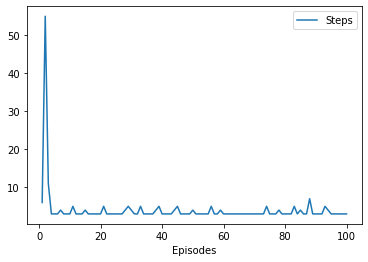

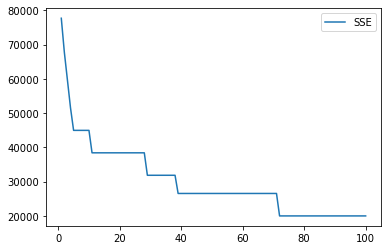

In [41]:
# Deterministic In class example
aRewards = [[2, 0, 100]]
aTerminals = [[2, 0]]

grid = setupGrid(3, 2, aRewards, aTerminals, None, None)
player = Player(grid, [0, 1])
qlearn = QLearn(0.9, None, True)

itersTruth = [50, 60, 70]
grid.determineQtruth(itersTruth, False, False)

iters = 100
player = Player(grid, [0, 1])
charts = Charts(iters)

#print(player.curr_state)
#print(grid.show_board)

run(False, iters, None, 0.1, False, 'ql')
print(player.qtable)
print(grid.show_board)

player.detPolicyV()


plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
plt.figure()
g2 = sns.lineplot(data=charts.sse)

CONVERGENCE!!!
qtruth
                          0                             1  \
0      [0, 47.81, 47.81, 0]      [0, 53.13, 53.13, 43.02]   
1  [43.02, 53.13, 53.13, 0]  [47.81, 59.04, 59.04, 47.81]   
2  [47.81, 59.04, 59.04, 0]    [53.13, 65.6, 65.6, 53.13]   
3    [53.13, 65.6, 65.6, 0]    [59.04, 72.9, 72.9, 59.04]   
4       [59.04, 72.9, 0, 0]         [65.6, 81.0, 0, 65.6]   

                            2                           3  \
0    [0, 59.04, 59.04, 47.81]      [0, 65.6, 65.6, 53.13]   
1  [53.13, 65.6, 65.6, 53.13]  [59.04, 72.9, 72.9, 59.04]   
2  [59.04, 72.9, 72.9, 59.04]    [65.6, 81.0, 81.0, 65.6]   
3    [65.6, 81.0, 81.0, 65.6]    [72.9, 90.0, 90.0, 72.9]   
4       [72.9, 90.0, 0, 72.9]      [81.0, 100.0, 0, 81.0]   

                        4  
0     [0, 0, 72.9, 59.04]  
1   [65.6, 0, 81.0, 65.6]  
2   [72.9, 0, 90.0, 72.9]  
3  [81.0, 0, 100.0, 81.0]  
4            [0, 0, 0, 0]  
   0  1  2  3  4
0  .  .  .  .  .
1  .  .  .  .  .
2  .  .  .  .  .
3  .  . 

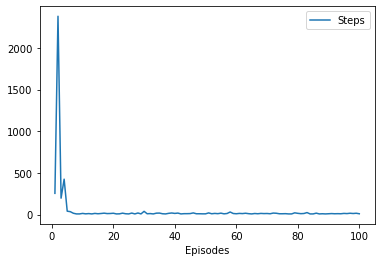

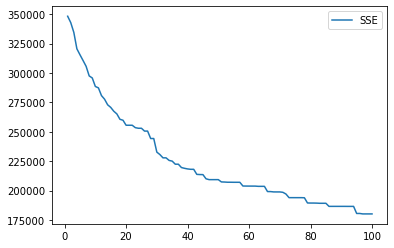

In [20]:
# finding the ground truth by determining at what level of iteration the diffences in the 
# qtables becoes small enough to conclude ground truth: using that as basis for 
# sum of squared errors calculation.

# QLearning Non-deterministic example
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)
#charts = Charts(runiters[i])

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)

runiters = [100]
for i in range(0, len(runiters)):

    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

    player.detPolicyV()

    print(player.policy)

    plt.figure()
    g1 = sns.lineplot(data=charts.stepsGoal)
    plt.figure()
    g2 = sns.lineplot(data=charts.sse)

    

    


CONVERGENCE!!!
qtruth
                          0                             1  \
0      [0, 47.81, 47.81, 0]      [0, 53.13, 53.13, 43.02]   
1  [43.02, 53.13, 53.13, 0]  [47.81, 59.04, 59.04, 47.81]   
2  [47.81, 59.04, 59.04, 0]    [53.13, 65.6, 65.6, 53.13]   
3    [53.13, 65.6, 65.6, 0]    [59.04, 72.9, 72.9, 59.04]   
4       [59.04, 72.9, 0, 0]         [65.6, 81.0, 0, 65.6]   

                            2                           3  \
0    [0, 59.04, 59.04, 47.81]      [0, 65.6, 65.6, 53.13]   
1  [53.13, 65.6, 65.6, 53.13]  [59.04, 72.9, 72.9, 59.04]   
2  [59.04, 72.9, 72.9, 59.04]    [65.6, 81.0, 81.0, 65.6]   
3    [65.6, 81.0, 81.0, 65.6]    [72.9, 90.0, 90.0, 72.9]   
4       [72.9, 90.0, 0, 72.9]      [81.0, 100.0, 0, 81.0]   

                        4  
0     [0, 0, 72.9, 59.04]  
1   [65.6, 0, 81.0, 65.6]  
2   [72.9, 0, 90.0, 72.9]  
3  [81.0, 0, 100.0, 81.0]  
4            [0, 0, 0, 0]  
   0  1  2  3  4
0  S  E  E  E  S
1  E  S  S  S  W
2  N  E  E  S  S
3  N  W 

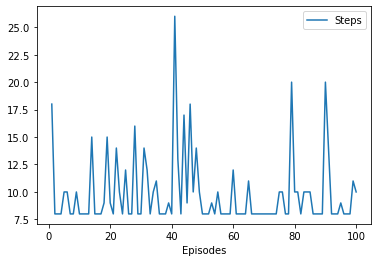

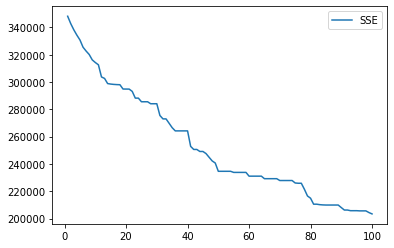

In [46]:
# SARSA
# predefined policy, not optimal
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)



runiters = [100]
for i in range(0, len(runiters)):

    p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    policy = pd.DataFrame(p)
    print(policy)

    player = Player(grid, [0, 0])
    player.policy = policy
    print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.1, False, 'sarsa')

    print(grid.show_board)

    #player.detPolicyV()

    print(player.policy)

    plt.figure()
    g1 = sns.lineplot(data=charts.stepsGoal)
    plt.figure()
    g2 = sns.lineplot(data=charts.sse)


    

    


CONVERGENCE!!!
in there
   0  1  2  3  4
0  S  E  E  E  S
1  E  S  S  S  W
2  N  E  E  S  S
3  N  W  W  E  S
4  N  W  W  E  N
   0  1  2  3  4
0  S  E  E  E  S
1  E  S  S  S  W
2  N  E  E  S  S
3  N  W  W  E  S
4  N  W  W  E  N
   0  1  2  3  4
0  .  .  .  .  .
1  .  .  .  .  .
2  .  .  .  .  .
3  .  .  .  .  .
4  .  .  .  .  *


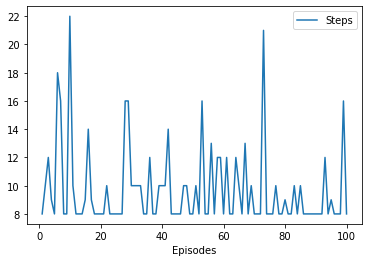

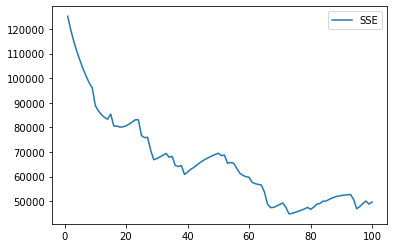

In [47]:
# TD prediction
# Use the V table instead of the Q table, V table is updated on each iteration based on reward location

aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

# Create V table
player.v[4][4] = 100
#print(player.v)

itersTruth = [100, 200, 500, 1000]

grid.determineQtruth(itersTruth, True, False)

#print("vtruth")
#print(grid.vtruth)


runiters = [100]
for i in range(0, len(runiters)):

    p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    policy = pd.DataFrame(p)
    print(policy)

    player = Player(grid, [0, 0])
    player.policy = policy
    print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.1, False, 'td')

    print(grid.show_board)


    plt.figure()
    g1 = sns.lineplot(data=charts.stepsGoal)
    plt.figure()
    g2 = sns.lineplot(data=charts.sse)



[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 1], [2, 2], [2, 3]]
CONVERGENCE!!!
qtruth
                          0                         1                     2  \
0      [0, 47.81, 47.81, 0]  [0, 53.13, 53.13, 43.02]  [0, 59.04, 0, 47.81]   
1  [43.02, 53.13, 53.13, 0]  [47.81, 0, 59.04, 47.81]          [0, 0, 0, 0]   
2  [47.81, 59.04, 59.04, 0]   [53.13, 0, 65.6, 53.13]          [0, 0, 0, 0]   
3    [53.13, 65.6, 65.6, 0]   [59.04, 0, 72.9, 59.04]          [0, 0, 0, 0]   
4       [59.04, 72.9, 0, 0]     [65.6, 81.0, 0, 65.6]    [0, 90.0, 0, 72.9]   

                        3                       4  
0  [0, 65.6, 65.6, 53.13]     [0, 0, 72.9, 59.04]  
1  [59.04, 72.9, 72.9, 0]   [65.6, 0, 81.0, 65.6]  
2   [65.6, 81.0, 81.0, 0]   [72.9, 0, 90.0, 72.9]  
3   [72.9, 90.0, 90.0, 0]  [81.0, 0, 100.0, 81.0]  
4  [81.0, 100.0, 0, 81.0]            [0, 0, 0, 0

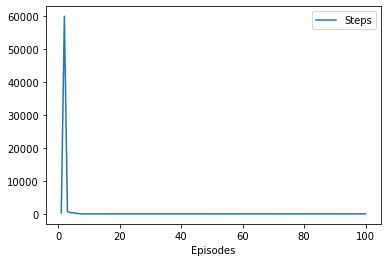

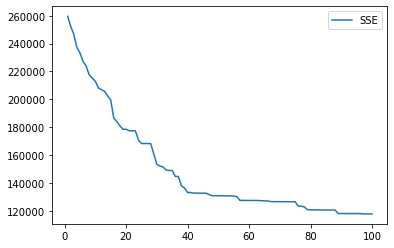

In [21]:
# QLearning Non-deterministic example with walls and 2 openings
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
grid.set_walls([[2, 1], [2, 2], [2, 3]])
print(grid.walls)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)

runiters = [100]
for i in range(0, len(runiters)):

    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])
    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

    player.detPolicyV()

    print(player.policy)

    plt.figure()
    g1 = sns.lineplot(data=charts.stepsGoal)
    plt.figure()
    g2 = sns.lineplot(data=charts.sse)

    

    


[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 1], [2, 2], [2, 3], [2, 4]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
CONVERGENCE!!!
qtruth
                          0                         1                     2  \
0      [0, 47.81, 38.71, 0]  [0, 53.13, 43.02, 43.02]  [0, 59.04, 0, 47.81]   
1  [43.02, 43.02, 34.83, 0]  [47.81, 0, 38.71, 38.71]          [0, 0, 0, 0]   
2  [38.71, 38.71, 31.34, 0] 

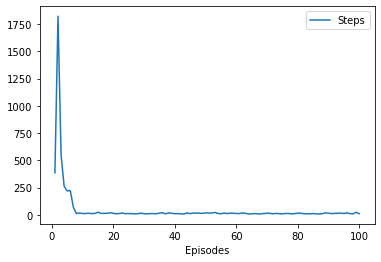

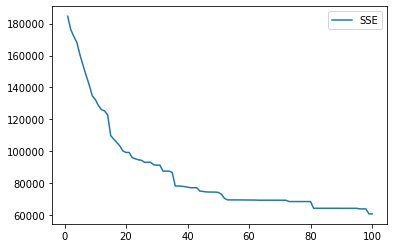

In [29]:
# QLearning Non-deterministic example with walls and one opening
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
grid.set_walls([[2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False)

print("qtruth")
print(grid.qtruth)

runiters = [100]
for i in range(0, len(runiters)):

    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])
    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

    player.detPolicyV()

    print(player.policy)

    plt.figure()
    g1 = sns.lineplot(data=charts.stepsGoal)
    plt.figure()
    g2 = sns.lineplot(data=charts.sse)

    

    


In [44]:
# QLearning Non-deterministic example with walls and with key and door
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, [0, 4], [2, 2])
grid.set_walls([[2, 0], [2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [1000]
grid.determineQtruth(itersTruth, False, True)

print("qtruth")
print(grid.qtruth)

runiters = [100]
for i in range(0, len(runiters)):

    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])
    print(grid.show_board)

    #path = [['S', 'E', 'S'], ['S', 'E', 'E', 'N'], ['S', 'E', 'E', 'S']]

    #run(True, iters, path, 0.1, False, 'ql')

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

    player.detPolicyV()

    print(player.policy)

    plt.figure()
    g1 = sns.lineplot(data=charts.stepsGoal)
    #plt.figure()
    #g2 = sns.lineplot(data=charts.sse)

    

    


[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4]]
qtableBeforeRun
              0             1             2             3             4
0  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
1  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
2  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
3  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
4  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]  [0, 0, 0, 0]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112

KeyboardInterrupt: 